In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
# 데이터 준비
from sklearn.datasets import load_breast_cancer

breast_cancer = load_breast_cancer()

X = breast_cancer['data']
y = breast_cancer['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [12]:
#
from sklearn.svm import SVC, LinearSVC

scores = []
for c in [1, 10, 100, 1000, 10000, 100000, 1000000, 10000000]:
    svc = SVC(C=c)

    svc.fit(X_train, y_train)
    # svc.score(X_train, y_train), svc.score(X_test, y_test)
    scores.append((c, svc.score(X_train, y_train), svc.score(X_test, y_test)))


In [ ]:
scores

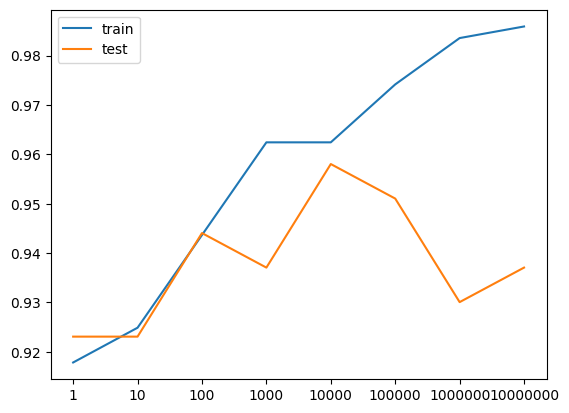

In [14]:
scores_df = pd.DataFrame(scores, columns=["C", "train", "test"])
plt.plot(scores_df['C'].astype("str"), scores_df['train'], label="train")
plt.plot(scores_df['C'].astype("str"), scores_df['test'], label='test')
plt.legend()
plt.show()

In [20]:
X.max(axis=0) - X.min(axis=0)

array([2.11290e+01, 2.95700e+01, 1.44710e+02, 2.35750e+03, 1.10770e-01,
       3.26020e-01, 4.26800e-01, 2.01200e-01, 1.98000e-01, 4.74800e-02,
       2.76150e+00, 4.52480e+00, 2.12230e+01, 5.35398e+02, 2.94170e-02,
       1.33148e-01, 3.96000e-01, 5.27900e-02, 7.10680e-02, 2.89452e-02,
       2.81100e+01, 3.75200e+01, 2.00790e+02, 4.06880e+03, 1.51430e-01,
       1.03071e+00, 1.25200e+00, 2.91000e-01, 5.07300e-01, 1.52460e-01])

In [21]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
mms.fit(X_train)
X_train_scaled = mms.transform(X_train)
X_test_scaled = mms.transform(X_test)

In [29]:
# scores = []
# for c in [1, 10, 100, 1000, 10000, 100000, 1000000, 10000000]:
svc = SVC(C=1)

svc.fit(X_train_scaled, y_train)
svc.score(X_train_scaled, y_train), svc.score(X_test_scaled, y_test)
# scores.append((c, svc.score(X_train_scaled, y_train), svc.score(X_test_scaled, y_test)))

(0.9788732394366197, 0.9790209790209791)